# Introduction

In this lab, we will use the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to cluster a synthetic dataset. DBSCAN is a clustering algorithm that identifies core samples in regions of high density and expands clusters from them. This algorithm is useful for data containing clusters of similar density.

# Data Generation

We will use the make_blobs function from the sklearn.datasets module to generate a synthetic dataset with three clusters. The dataset will consist of 750 samples with a cluster standard deviation of 0.4. We will also standardize the data using the StandardScaler from the sklearn.preprocessing module.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# Data Visualization

We can visualize the resulting data using the matplotlib.pyplot module.

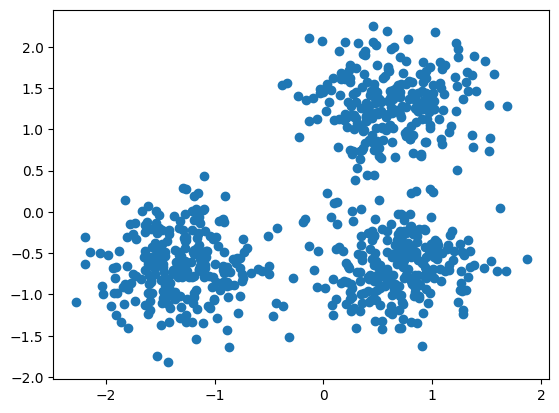

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Compute DBSCAN

We will use the DBSCAN class from the sklearn.cluster module to compute the clusters. We will set the eps parameter to 0.3 and the minsamples parameter to 10. We can access the labels assigned by DBSCAN using the labels attribute. Noisy samples are given the label -1. We will also calculate the number of clusters and the number of noise points.

In [4]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


# Evaluation Metrics

We can use evaluation metrics to quantify the quality of the resulting clusters. We will use the homogeneity, completeness, V-measure, adjusted Rand index, adjusted mutual information, and silhouette coefficient metrics. We will access these metrics from the sklearn.metrics module. If the ground truth labels are not known, evaluation can only be performed using the model results itself. In that case, the silhouette coefficient comes in handy.

In [5]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


# Plot Results

We will use the matplotlib.pyplot module to plot the results. Core samples (large dots) and non-core samples (small dots) are color-coded according to the assigned cluster. Samples tagged as noise are represented in black.

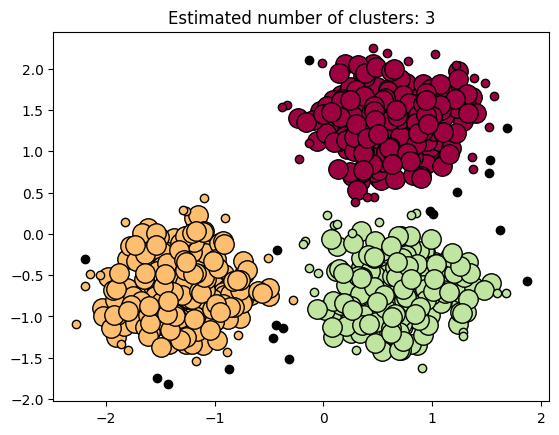

In [6]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# Summary

In this lab, we used the DBSCAN clustering algorithm to cluster a synthetic dataset. We generated a dataset, visualized the data, computed the clusters, evaluated the metrics, and plotted the results.